## **Thu thập dữ liệu**

#### Chủ đề của dữ liệu là gì?
  * **Chủ đề:** Bộ dữ liệu chứa thông tin chi tiết về các bài hát trên nền tảng ứng dụng **Spotify**, bao gồm các đặc trưng âm thanh như **danceability** (độ có thể nhảy), **energy** (năng lượng), **key** (điệu), và **popularity** (độ phổ biến).
  * **Bối cảnh:** Dữ liệu đại diện cho các bài hát thuộc 125 thể loại nhạc khác nhau, phản ánh đặc điểm âm nhạc và mức độ phổ biến của chúng trên nền tảng ứng dụng Spotify.

#### Nguồn gốc của dữ liệu là ở đâu?
  * **Nền tảng:** Hugging Face.
  * **URL:** [Hugging Face](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)
  * **Tác giả:** Maharshi Pandya.
  * **Ngày công bố:** Bộ dữ liệu được cập nhật khoảng 2 năm trước (theo thông tin commit trên Hugging Face).

#### Dữ liệu này có được cấp phép để bạn sử dụng không?
  * **Giấy phép:** Trên Hugging Face, dataset được ghi giấy phép là **BSD** $\to$ Điều này cho phép sử dụng cho mục đích giáo dục và nghiên cứu.
  * **Cách sử dụng:** Bạn được phép sử dụng để phân tích và xây dựng mô hình học máy.

#### Phương pháp để thu thập dữ liệu này là gì?
  * **Phương pháp:** Dữ liệu được thu thập và làm sạch bằng cách sử dụng **Spotify Web API** thông qua Python. Tác giả đã truy xuất các tính năng âm thanh cho các bài hát từ nhiều thể loại khác nhau.
  * **Đối tượng mẫu:** Bao gồm khoảng 114,000 bài hát thuộc 125 thể loại khác nhau.
  * **Quy trình:** Dữ liệu không phải là ngẫu nhiên hoàn toàn mà được truy vấn theo danh sách các thể loại nhạc để đảm bảo sự đa dạng và cân bằng giữa các lớp.
  * **Hạn chế:** Vì dữ liệu được lấy qua API tại một thời điểm nhất định (năm 2022), chỉ số độ phổ biến mang tính thời điểm và có thể đã thay đổi so với hiện tại.

#### Lý do để nhóm chọn dataset này là gì?
  * **Hứng thú:** Nhóm quan tâm đến lĩnh vực âm nhạc và muốn tìm hiểu các yếu tố kỹ thuật như nhịp điệu nhanh hay chậm, bài hát buồn hay vui,... ảnh hưởng thế nào đến sự phổ biến của một bài hát.
  * **Tiềm năng phân tích:** Dataset có kích thước đủ lớn (hơn 100 nghìn dòng, 21 cột), chứa cả dữ liệu số và phân loại, rất phù hợp để đặt câu hỏi về phân lớp (Classification - ví dụ: dự đoán thể loại nhạc) hoặc hồi quy (Regression - ví dụ: dự đoán độ phổ biến).

## **Khám phá dữ liệu**

### **Khai báo thư viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### **Tổng quan về dữ liệu**

#### Dữ liệu có bao nhiêu dòng, bao nhiêu cột và kiểu dữ liệu của từng cột là gì? 

In [2]:
# Đọc dữ liệu
df = pd.read_csv('../data/raw/spotify_dataset.csv')

# Xem 5 dòng đầu tiên
display(df.head())

# Tổng quan kích thước (Rows, Columns)
print(f"Số dòng: {df.shape[0]}")
print(f"Số cột: {df.shape[1]}")

# Kiểm tra kiểu dữ liệu và bộ nhớ
print("\nThông tin về kiểu dữ liệu")
df.info()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Số dòng: 114000
Số cột: 21

Thông tin về kiểu dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalne

#### Các dòng của dữ liệu có bị trùng lặp hay không?

In [3]:
# Kiểm tra dòng trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {num_duplicates}")

Số dòng bị trùng lặp: 0


#### Dữ liệu có bị thiếu hay không? 

In [4]:
# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()
print("\n--- Số lượng giá trị bị thiếu (Null) ---")
print(missing_values[missing_values > 0]) # Chỉ in các cột có dữ liệu thiếu


--- Số lượng giá trị bị thiếu (Null) ---
artists       1
album_name    1
track_name    1
dtype: int64


#### Từng cột có ý nghĩa gì?

* **track_id:** ID duy nhất của bài hát trên Spotify.
* **artists:** Tên nghệ sĩ biểu diễn.
* **album_name:** Tên album chứa bài hát.
* **track_name:** Tên bài hát.
* **popularity:** Điểm phổ biến (0-100), càng cao càng nổi tiếng.
* **duration_ms:** Độ dài bài hát tính bằng mili-giây.
* **explicit:** Đánh dấu bài hát có nội dung nhạy cảm hay không.
* **danceability:** Độ thích hợp để nhảy (0.0 - 1.0).
* **energy:** Mức năng lượng/cường độ của bài hát (0.0 - 1.0).
* **key:** Tông nhạc.
* **loudness:** Độ to trung bình (dB).
* **mode:** Điệu thức (1 = Major/Trưởng, 0 = Minor/Thứ).
* **speechiness:** Mức độ chứa từ ngữ.
* **acousticness:** Độ mộc của bài hát.
* **instrumentalness:** Dự đoán bài hát không có lời.
* **liveness:** Xác suất bài hát được thu âm trực tiếp.
* **valence:** Cảm xúc tích cực của bài hát.
* **tempo:** Nhịp độ.
* **time_signature:** Số chỉ nhịp.
* **track_genre:** Thể loại nhạc.

#### Những cột nào có liên quan đến phân tích tiềm năng?

Hầu hết các cột đều quan trọng. Đặc biệt là các đặc trưng âm thanh (**danceability**, **energy**, **valence**, **tempo**...) để chạy mô hình, và **track_genre**, **popularity** làm biến mục tiêu.

#### Có cột nào cần được bỏ đi không? Tại sao?

Cần xóa cột **Unnamed** (thường là chỉ số index thừa từ file CSV cũ) và **track_id** (không có giá trị phân tích mô hình, chỉ dùng để định danh lúc đầu).

#### Có cột nào có kiểu dữ liệu không phù hợp không?
Thường bộ dữ liệu này khá chuẩn. Tuy nhiên, cần kiểm tra cột **explicit**. Đôi khi pandas đọc nó là *Object* (chuỗi "True"/ hoặc "False") thay vì *Boolean*.


#### Những cột nào cần chuyển đổi loại?

* Nếu **explicit** đang là object, cần chuyển sang boolean hoặc int (1/0).
* **duration_ms** có thể chuyển đổi từ mili-giây sang phút để dễ hình dung hơn khi phân tích, dù không bắt buộc về mặt kỹ thuật.

### **Phân tích các cột số**

In [5]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Loại bỏ các cột mang giá trị là số nhưng bản chất đặc trưng là định danh
non_numerical_cols = ['Unnamed: 0', 'key', 'mode', 'time_signature']
for col in non_numerical_cols:
    numerical_cols.remove(col)

numerical_cols

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

#### Hình dạng phân phối của từng đặc trưng số là gì?

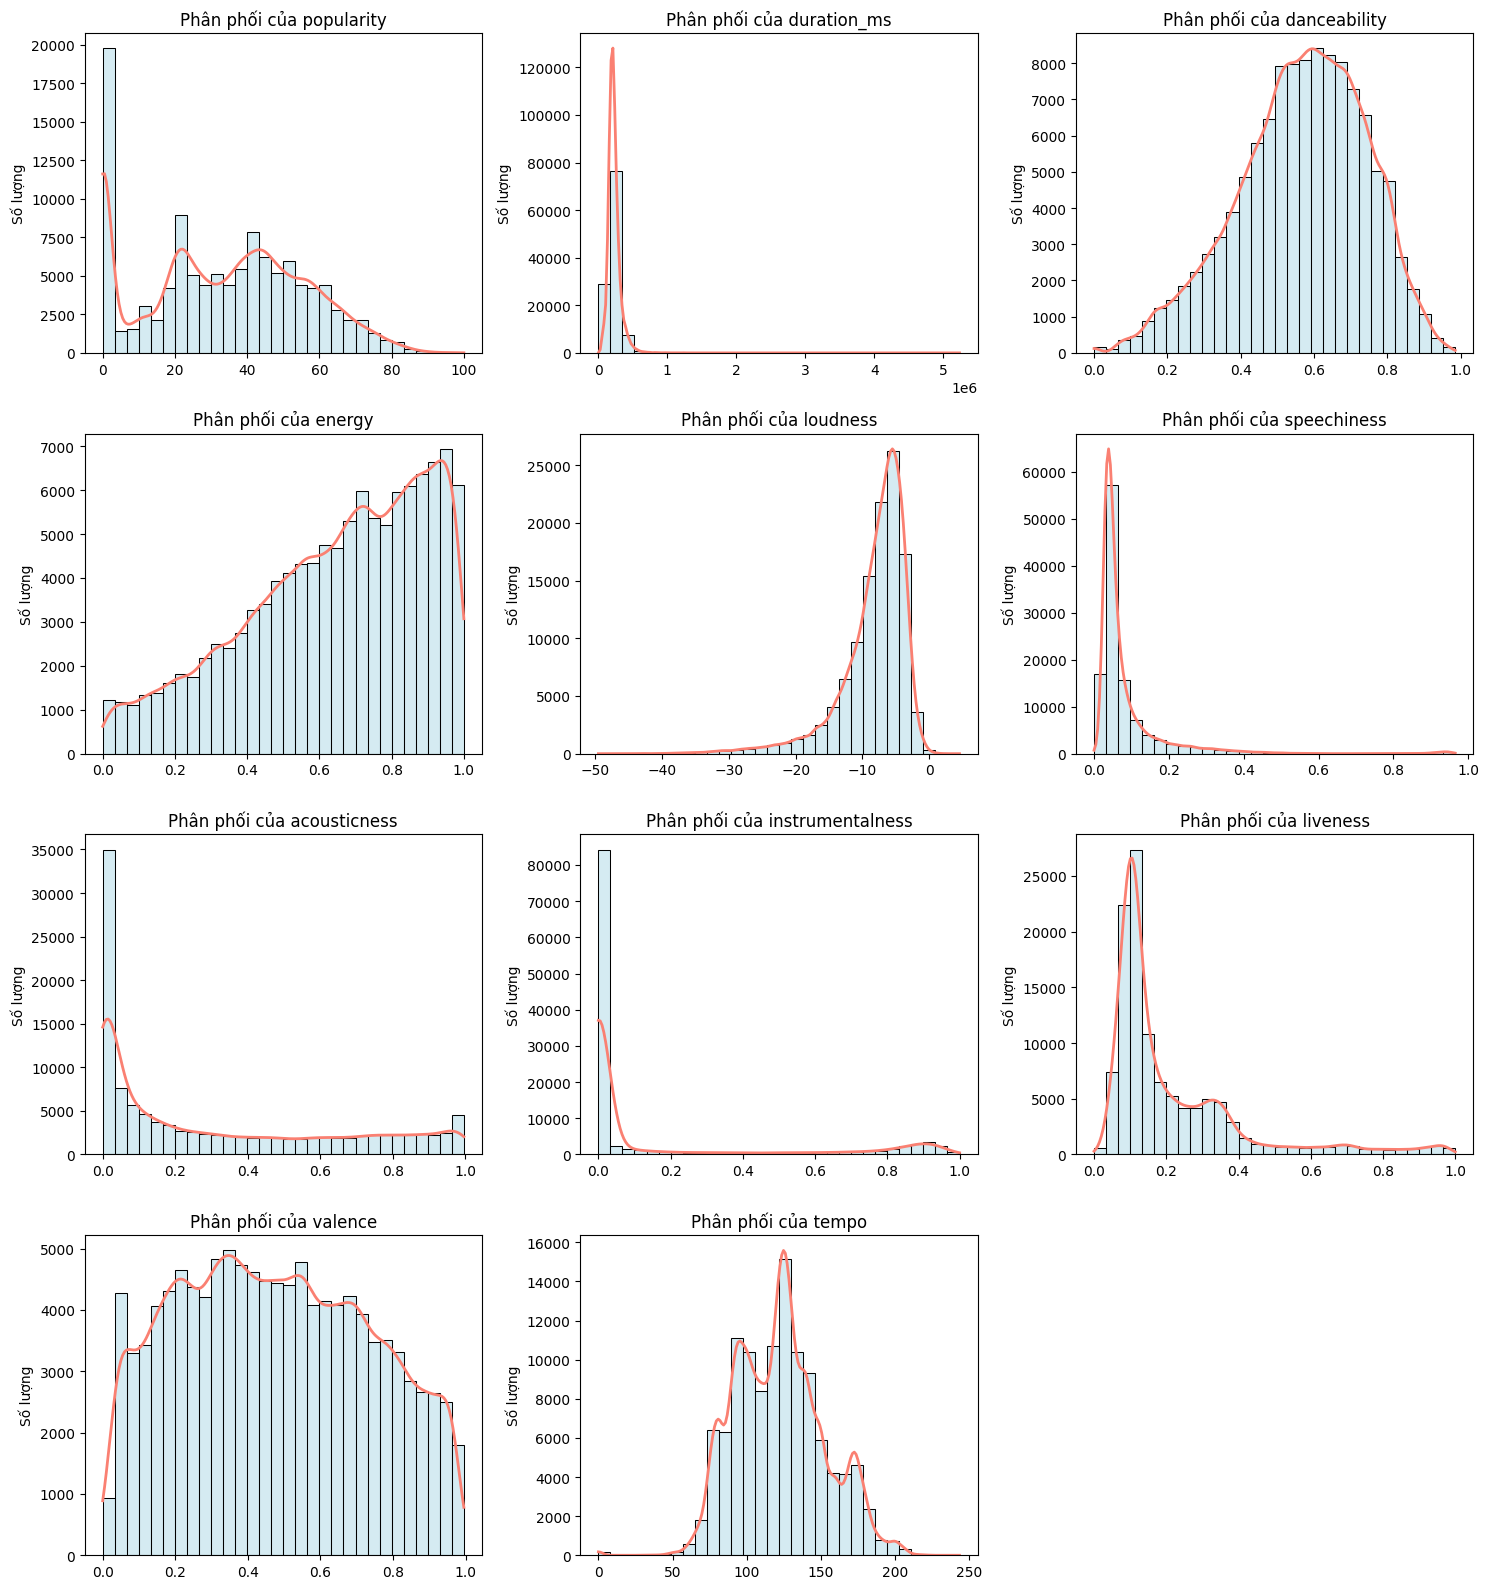

In [6]:
# Tính toán kích thước lưới biểu đồ
num_plots = len(numerical_cols)
cols = 3  # Số biểu đồ trên 1 hàng
rows = math.ceil(num_plots / cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i], color='lightblue', edgecolor='black')

    if len(axes[i].lines) > 0:
        axes[i].lines[0].set_color('salmon')       # Đổi màu thành đỏ
        axes[i].lines[0].set_linewidth(2)

    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Phân phối Chuẩn: **danceability**, **valence** và **tempo**
* Phân phối Lệch:
    * Lệch phải: **loudness** và **energy**
    * Lệch trái: **popularity**, **duration_ms**, **speechiness**, **acousticness**, **instrumentalness** và **liveness**

#### Giá trị lớn nhất/nhỏ nhất, trung bình cộng, trung vị, độ lệch chuẩn của từng đặc trưng số là gì?

In [7]:
display(df.drop(columns=[col for col in non_numerical_cols if col in df.columns]).describe())

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,-8.258960,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837
std,22.305078,1.072977e+05,0.173542,0.251529,5.029337,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197
min,0.000000,0.000000e+00,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750
50%,35.000000,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,50.000000,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


#### Các giá trị lớn nhất/nhỏ nhất có hợp lý không, nếu không thì chúng cho thấy có lỗi gì?

* **Các đặc trưng hợp lý:**
    * Các đặc trưng đã được chuẩn hóa (**danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence**) đều nằm trọn trong khoảng **[0, 1]**.
    * Bên cạnh đó, **popularity** và **loudness** tuân thủ đúng định nghĩa thực tế.
* **Các đặc trưng có dấu hiệu lỗi:**
    * **tempo** và **duration_ms** đều có **min = 0**, đây là điều vô lý về mặt vật lý vì nhạc phải có nhịp và phải có thời gian lớn hơn bằng 0 $\to$ Đây là dấu hiệu có thể **dữ liệu bị thiếu** được điền tạm là 0.

#### Các giá trị ngoại lệ có phải là giá trị cực đoan thực sự hay chỉ là lỗi nhập liệu?

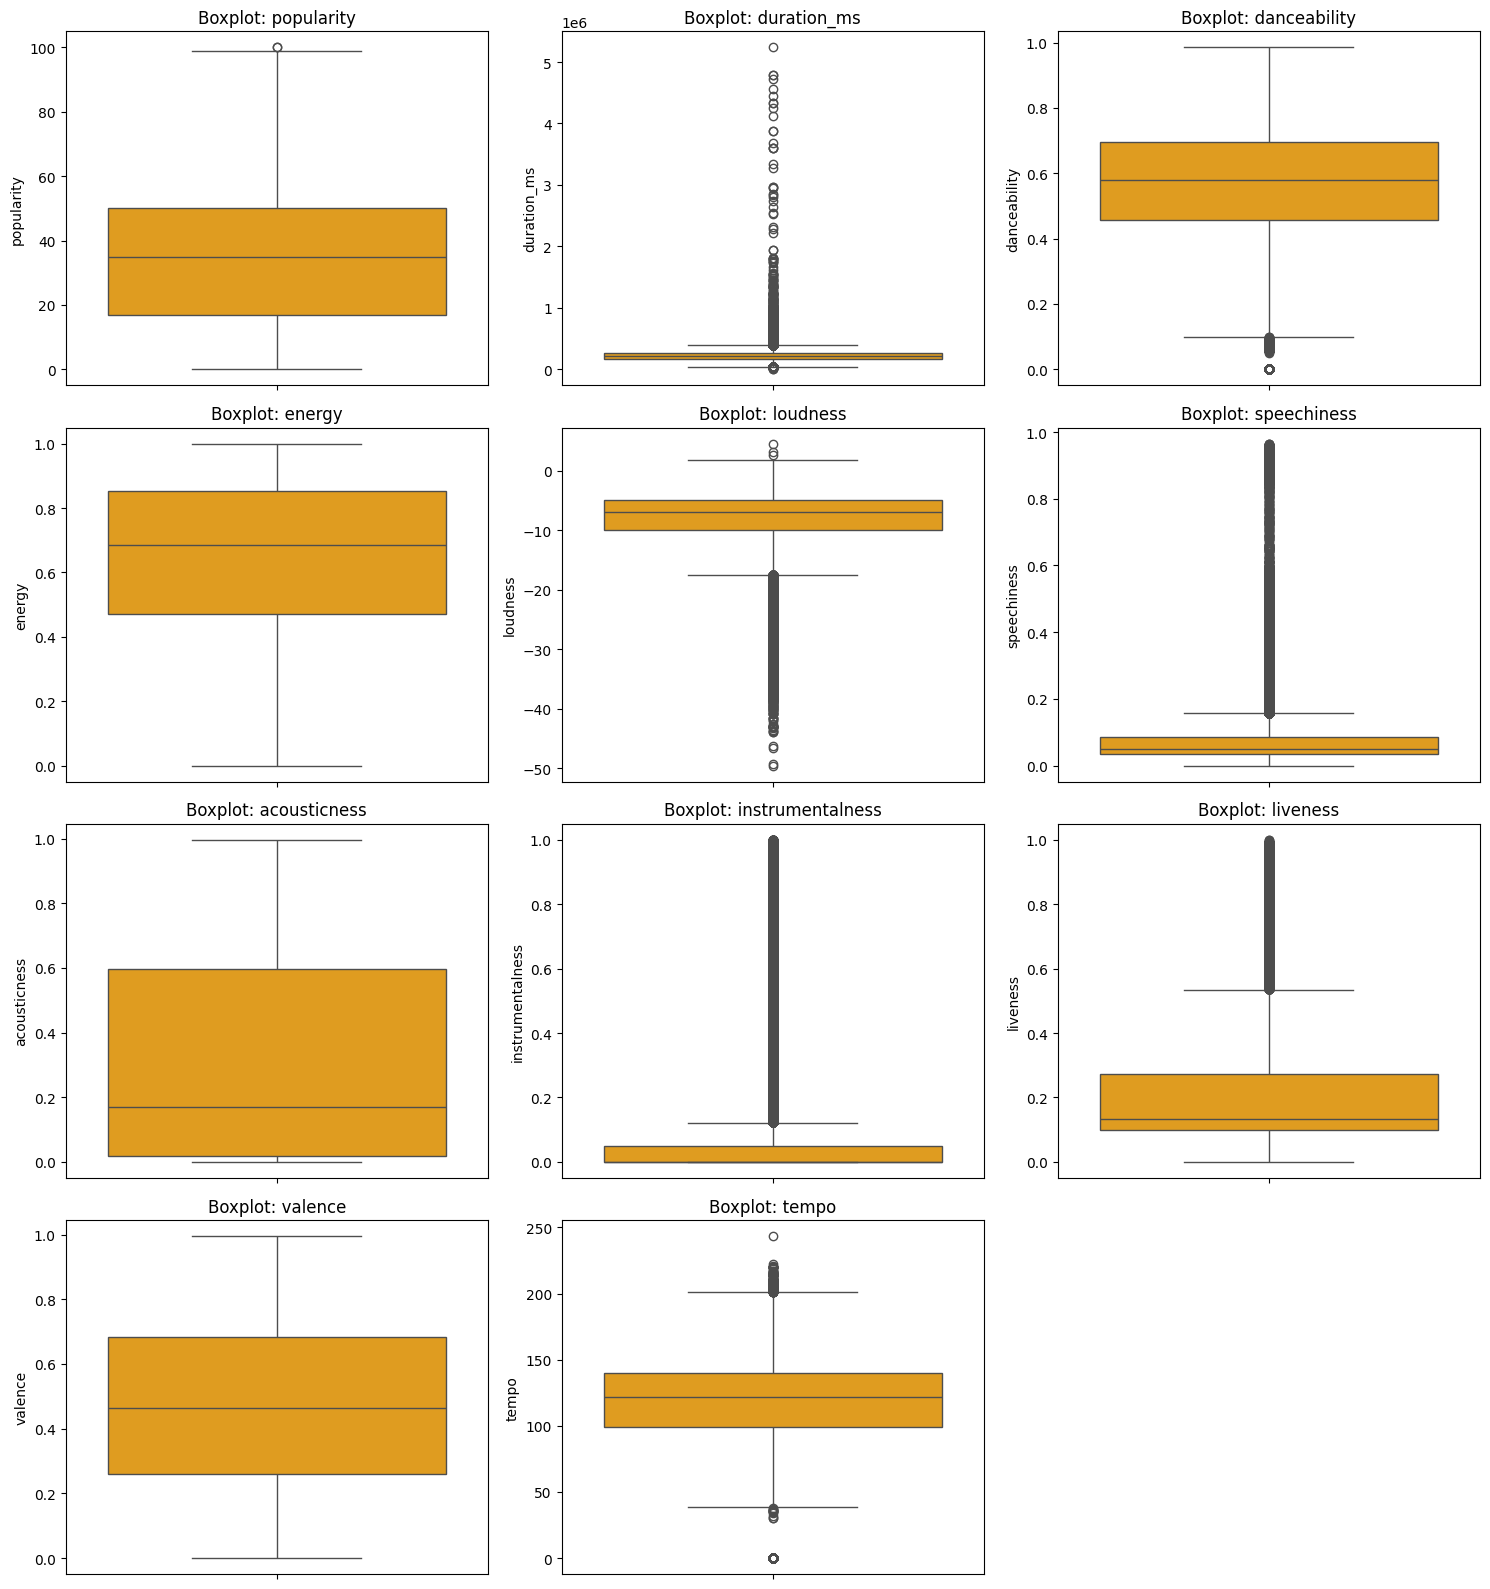

Phân tích ngoại lai bằng IQR


,Feature,Outliers count,Percentage,Lower bound,Upper bound
0,popularity,2,0.00,-32.50,99.50
1,duration_ms,5617,4.93,42906.00,392666.00
2,danceability,620,0.54,0.10,1.05
3,energy,0,0.00,-0.10,1.43
4,loudness,6173,5.41,-17.53,2.51
5,speechiness,13211,11.59,-0.04,0.16
6,acousticness,0,0.00,-0.85,1.47
7,instrumentalness,25246,22.15,-0.07,0.12
8,liveness,8642,7.58,-0.16,0.54
9,valence,0,0.00,-0.37,1.32


In [8]:
# Tính toán lưới biểu đồ
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='orange')
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].set_xlabel('')

# Xóa các ô thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Phân tích ngoại lai bằng IQR")

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)
    pct_outliers = (num_outliers / len(df)) * 100
    
    return num_outliers, pct_outliers, lower_bound, upper_bound

# Tạo bảng tổng hợp kết quả
outlier_report = []

for col in numerical_cols:
    num, pct, low, high = detect_outliers_iqr(df, col)
    outlier_report.append({
        'Feature': col,
        'Outliers count': num,
        'Percentage': round(pct, 2),
        'Lower bound': round(low, 2),
        'Upper bound': round(high, 2)
    })

# Hiển thị bảng kết quả
outlier_df = pd.DataFrame(outlier_report)
display(outlier_df)

**Nhận định về ngoại lai của các đặc trưng:**

* **duration_ms:**
    * **Quan sát:** Có rất nhiều ngoại lai vượt ngưỡng trên, một số bài dài tới hàng triệu ms.
    * **Kết luận:** Các bài hát này có thể là Podcast, nhạc giao hưởng, hoặc các bản Mix dài. Tuy nhiên, các giá trị ngoại lai ở mức thấp (bằng 0) là **lỗi** như đã phân tích ở trước đó $\to$ đa số vẫn là dữ liệu thực.

* **speechiness và instrumentalness:**
    * **Quan sát:** Tỷ lệ ngoại lai rất cao, lên đến xấp xỉ 12% và hơn 22%. 
    * **Kết luận:**
        * Với *Speechiness*: Có thể đa số các bài nhạc là hát nên có giá trị thấp, các bài Rap hoặc Podcast có giá trị cao sẽ bị coi là ngoại lai về mặt thống kê, nhưng chúng hoàn toàn hợp lệ $\to$ vẫn là dữ liệu thực.
        * Với *Instrumentalness*: Đa số bài có lời, nên các bài không lời (Beat/Instrumental) có thể sẽ hiện lên là ngoại lai $\to$ vẫn là dữ liệu thực.

* **loudness:**
    * **Quan sát:** Có các ngoại lai ở phía âm có giá trị lên đến **-50dB**.
    * **Kết luận:** Đây có thể là các bài nhạc cổ điển hoặc bài thiền, thu âm rất nhỏ so với nhạc Pop hiện đại.

* **tempo:**
    * **Quan sát:** Có ngoại lai bằng 0.
    * **Kết luận:** **min = 0** là **lỗi** dữ liệu cần xử lý như đã phân tích trước đó. Các ngoại lai ở mức cao (**lớn hơn 200 BPM**) có thể là dòng nhạc **Speedcore** hoặc **Drum & Bass** $\to$ đa số vẫn là dữ liệu thực.

* **liveness:**
    * **Quan sát:** Phân phối bị lệch phải mạnh, xuất hiện nhiều ngoại lai ở ngưỡng giá trị cao (trên 0.8).
    * **Kết luận:** Đa số các bài hát là bản thu âm trong phòng thu nên chỉ số này thường thấp. Các ngoại lai giá trị cao có thể là các bản thu âm trực tiếp $\to$ đây là dữ liệu thực và quan trọng để phân biệt tính chất bài hát.

* **danceability:**
    * **Quan sát:** Xuất hiện các ngoại lai ở mức giá trị cực thấp (gần bằng 0).
    * **Kết luận:** Đây là các bài hát hoặc âm thanh có nhịp độ rất khó để nhảy như nhạc thiền, podcast,... $\to$ vẫn là dữ liệu thực phản ánh sự đa dạng của kho nhạc.

#### Có giá trị nào không thể xảy ra không? Có giá trị giữ chỗ nào không?

Có, chúng ta đã phát hiện một số giá trị không thể xảy ra trong thực tế (về mặt vật lý âm thanh) nhờ vào việc phát hiện ra giá trị lớn nhất/nhỏ nhất của từng cột ở trước đó:
* **tempo**
    * **Phát hiện:** Giá trị nhỏ nhất của cột **tempo** là **0**.
    * **Lý do:** Nhịp độ (BPM - Beats Per Minute) đo tốc độ của bài hát. Một bài hát không thể có tốc độ bằng 0 (tức là đứng im).
* **duration_ms**
    * **Phát hiện:** Giá trị nhỏ nhất của cột **duration_ms** là **0**.
    * **Lý do:** Không thể coi một file âm thanh nào có độ dài là 0ms.

Ngoài ra, bộ dữ liệu này sử dụng số **0** làm giá trị giữ chỗ thay vì để trống cụ thể là cột **tempo** và **duraton__ms** có số **0** được dùng để lấp vào chỗ trống khi không thu thập được thông tin $\to$ Đây thực chất là **giá trị bị thiếu**.

In [9]:
# Kiểm tra giá trị bất hợp lý và giá trị giữ chỗ
impossible_tempo = df[df['tempo'] == 0].shape[0]
impossible_time_sig = df[df['duration_ms'] == 0].shape[0]

print(f"Số bài hát có 'tempo' = 0: {impossible_tempo} dòng")
print(f"Số bài hát có 'duration_ms' = 0: {impossible_time_sig} dòng")

Số bài hát có 'tempo' = 0: 157 dòng
Số bài hát có 'duration_ms' = 0: 1 dòng


## **Phân tích các cột phân loại**

### **Xác định các cột phân loại**

- Các thuộc tính phân loại trong tập dữ liệu:
    - **Thuộc tính Nominal:** artists, album_name, track_name, track_genre.
    - **Thuộc tính Ordinal:** key, time_signature
    - **Thuộc tính Binary:** explicit, mode.

In [10]:
norminal_cols = ['artists', 'album_name', 'track_name', 'track_genre']
ordinal_cols = ['key', 'time_signature']
binary_cols = ['explicit', 'mode']

print("="*10 + "Các cột phân loại" + "="*10)
print("Các cột Nominal:", norminal_cols)
print("Các cột Ordinal", ordinal_cols)
print("Các cột Binary:", binary_cols)

==========Các cột phân loại==========
Các cột Nominal: ['artists', 'album_name', 'track_name', 'track_genre']
Các cột Ordinal ['key', 'time_signature']
Các cột Binary: ['explicit', 'mode']


### **Thống kê cơ bản**

#### **Cột Nominal**

In [11]:
print("="*10 + "Thống kê các cột Nominal" + "="*10)
for col in norminal_cols:
    unique_values = df[col].value_counts()
    print(f"Cột: {col}")
    print(f"    Số lượng giá trị duy nhất: {df[col].nunique()}")
    print(f"    Top 5 giá trị phổ biến nhất:")
    for value, count in unique_values.head(5).items():
        print(f"        {value}: {count} | Tỷ lệ: {count / len(df) * 100:.2f}%")

==========Thống kê các cột Nominal==========
Cột: artists
    Số lượng giá trị duy nhất: 31437
    Top 5 giá trị phổ biến nhất:
        The Beatles: 279 | Tỷ lệ: 0.24%
        George Jones: 271 | Tỷ lệ: 0.24%
        Stevie Wonder: 236 | Tỷ lệ: 0.21%
        Linkin Park: 224 | Tỷ lệ: 0.20%
        Ella Fitzgerald: 222 | Tỷ lệ: 0.19%
Cột: album_name
    Số lượng giá trị duy nhất: 46589
    Top 5 giá trị phổ biến nhất:
        Alternative Christmas 2022: 195 | Tỷ lệ: 0.17%
        Feliz Cumpleaños con Perreo: 184 | Tỷ lệ: 0.16%
        Metal: 143 | Tỷ lệ: 0.13%
        Halloween con perreito: 123 | Tỷ lệ: 0.11%
        Halloween Party 2022: 115 | Tỷ lệ: 0.10%
Cột: track_name
    Số lượng giá trị duy nhất: 73608
    Top 5 giá trị phổ biến nhất:
        Run Rudolph Run: 151 | Tỷ lệ: 0.13%
        Halloween: 88 | Tỷ lệ: 0.08%
        Frosty The Snowman: 81 | Tỷ lệ: 0.07%
        Little Saint Nick - 1991 Remix: 76 | Tỷ lệ: 0.07%
        Last Last: 75 | Tỷ lệ: 0.07%
Cột: track_genre
    Số lư

#### **Cột Ordinal**

In [12]:
print("="*10 + "Thống kê các cột Ordinal" + "="*10)
for col in ordinal_cols:
    unique_values = df[col].value_counts().sort_index()  # Sắp theo thứ tự ordinal
    print(f"Cột: {col}")
    print(f"    Số lượng giá trị duy nhất: {df[col].nunique()}")
    print(f"    Số lượng và tỷ lệ của từng giá trị:")
    for value, count in unique_values.items():
        print(f"        {value}: {count} | Tỷ lệ: {count / len(df) * 100:.2f}%")

==========Thống kê các cột Ordinal==========
Cột: key
    Số lượng giá trị duy nhất: 12
    Số lượng và tỷ lệ của từng giá trị:
        0: 13061 | Tỷ lệ: 11.46%
        1: 10772 | Tỷ lệ: 9.45%
        2: 11644 | Tỷ lệ: 10.21%
        3: 3570 | Tỷ lệ: 3.13%
        4: 9008 | Tỷ lệ: 7.90%
        5: 9368 | Tỷ lệ: 8.22%
        6: 7921 | Tỷ lệ: 6.95%
        7: 13245 | Tỷ lệ: 11.62%
        8: 7360 | Tỷ lệ: 6.46%
        9: 11313 | Tỷ lệ: 9.92%
        10: 7456 | Tỷ lệ: 6.54%
        11: 9282 | Tỷ lệ: 8.14%
Cột: time_signature
    Số lượng giá trị duy nhất: 5
    Số lượng và tỷ lệ của từng giá trị:
        0: 163 | Tỷ lệ: 0.14%
        1: 973 | Tỷ lệ: 0.85%
        3: 9195 | Tỷ lệ: 8.07%
        4: 101843 | Tỷ lệ: 89.34%
        5: 1826 | Tỷ lệ: 1.60%


#### **Cột Binary**

In [13]:
print("="*10 + "Thống kê các cột Binary" + "="*10)
for col in binary_cols:
    unique_values = df[col].value_counts()
    print(f"Cột: {col}")
    print(f"    Số lượng và tỷ lệ của từng giá trị:")
    for value, count in unique_values.items():
        print(f"        {value}: {count} | Tỷ lệ: {count / len(df) * 100:.2f}%")

==========Thống kê các cột Binary==========
Cột: explicit
    Số lượng và tỷ lệ của từng giá trị:
        False: 104253 | Tỷ lệ: 91.45%
        True: 9747 | Tỷ lệ: 8.55%
Cột: mode
    Số lượng và tỷ lệ của từng giá trị:
        1: 72681 | Tỷ lệ: 63.76%
        0: 41319 | Tỷ lệ: 36.24%


### **Trực quan hóa**

#### **Cột Norminal**

##### **Tỷ lệ nhóm hàng đầu (Top 20) và nhóm còn lại** 

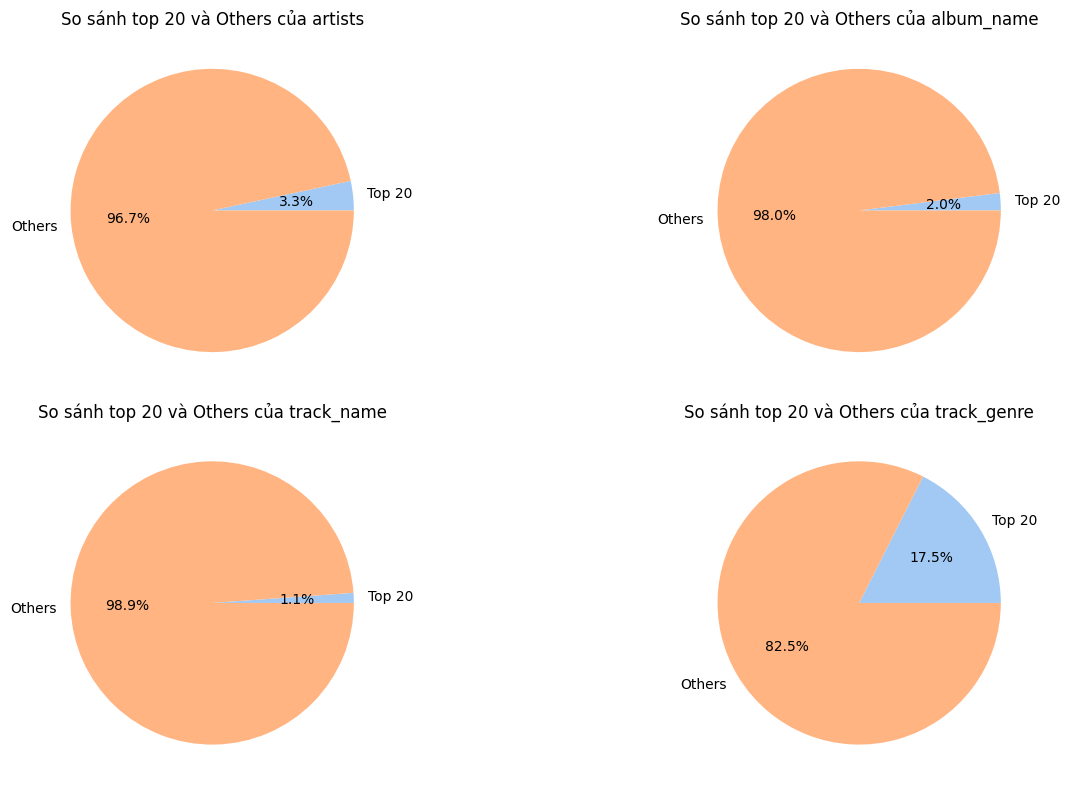

In [14]:
# Tính toán kích thước lưới biểu đồ
nor_plots = len(norminal_cols)
nor_cols = 2  # Số biểu đồ trên 1 hàng
nor_rows = math.ceil(nor_plots / nor_cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(nor_rows, nor_cols, figsize=(15, 4 * nor_rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(norminal_cols):
    unique_values = df[col].value_counts()
    top_20_count = unique_values.head(20).sum()
    others_count = unique_values.iloc[20:].sum()
    if others_count > 0:
        top_20_with_others = pd.concat([pd.Series({'Top 20': top_20_count}), pd.Series({'Others': others_count})])
    else:
        top_20_with_others = top_20_count
    axes[i].pie(top_20_with_others.values, labels=top_20_with_others.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))

    axes[i].set_title(f'So sánh top 20 và Others của {col}')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Nhận xét**
    - Nhìn chung, các dữ liệu nằm ngoài Top 20 (nhóm Others) chiếm tỷ trọng áp đảo (từ 82.5% đến 98.9%).
    - Điều này cho thấy dữ liệu có độ phân tán lớn và độ đa dạng cao, không bị chi phối cục bộ bởi một nhóm nhỏ các giá trị đứng đầu.

##### **Phân phối của nhóm hàng đầu (Top 20)** 

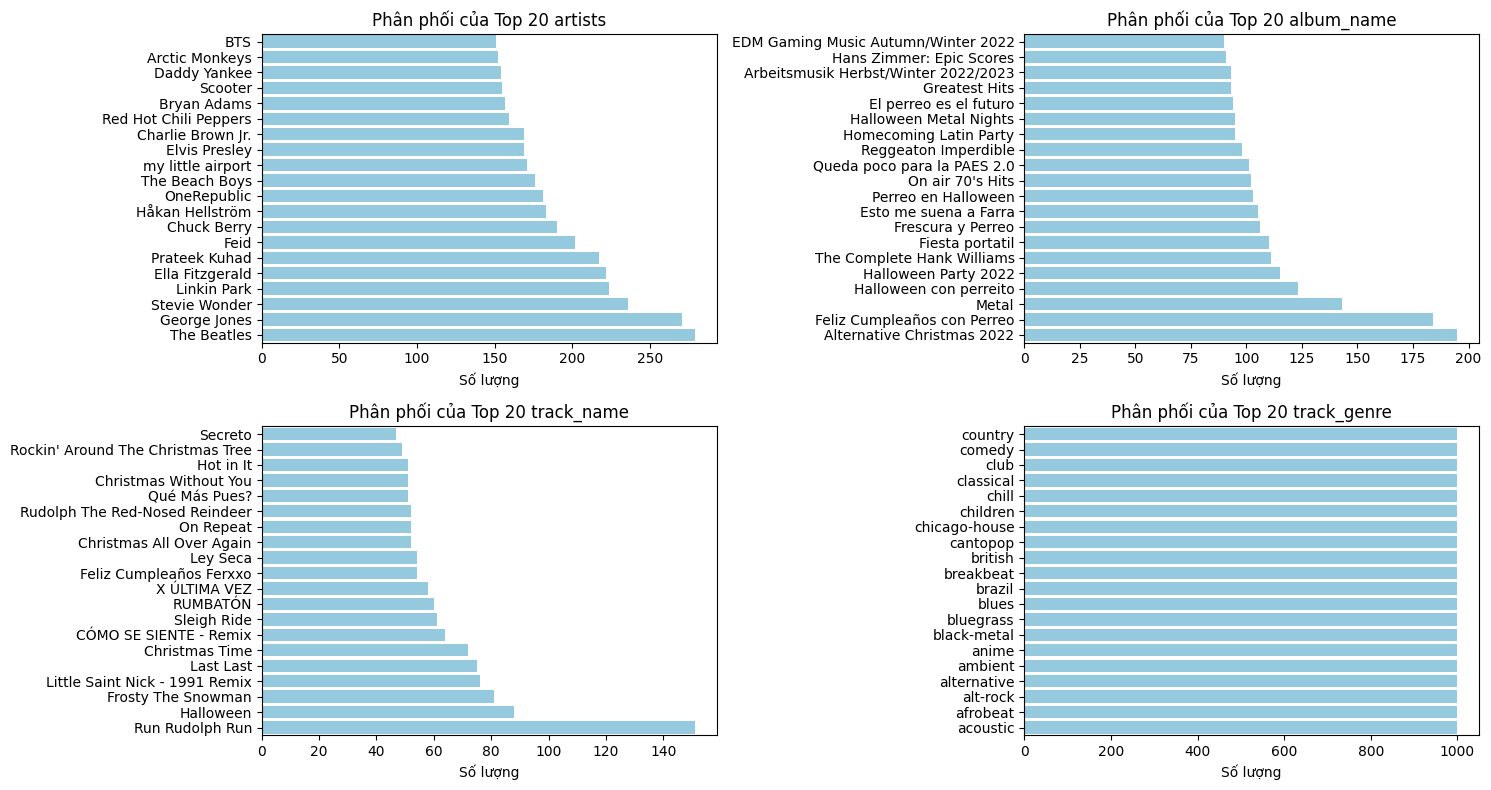

In [15]:
# Tính toán kích thước lưới biểu đồ
nor_plots = len(norminal_cols)
nor_cols = 2  # Số biểu đồ trên 1 hàng
nor_rows = math.ceil(nor_plots / nor_cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(nor_rows, nor_cols, figsize=(15, 4 * nor_rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(norminal_cols):
    unique_values = df[col].value_counts()
    top_20 = unique_values.head(20)
    sns.barplot(y=top_20.index, x=top_20.values, ax=axes[i], color='skyblue')
    axes[i].invert_yaxis() 

    axes[i].set_title(f'Phân phối của Top 20 {col}')
    axes[i].set_xlabel('Số lượng')
    axes[i].set_ylabel('')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- **Nhận xét:**
    - Thuộc tính `artists`: Khoảng biến thiên trong Top 20 khá rộng (từ ~150 đến ~280), cho thấy ngay cả trong nhóm phổ biến nhất, mức độ đóng góp dữ liệu của các nghệ sĩ cũng không đồng nhất.
    - Thuộc tính `track_name` và `album_name`: Nhóm phổ biến nhất chịu ảnh hưởng mạnh bởi yếu tố mùa vụ, với các từ khóa liên quan đến "Christmas" và "Halloween" chiếm tỷ trọng áp đảo tại các vị trí dẫn đầu.
    - Thuộc tính `track_genre`: Nhóm phổ biến đạt trạng thái cân bằng hoàn hảo với tần suất cố định (1000) cho mỗi thể loại

### **Cột Ordinal**

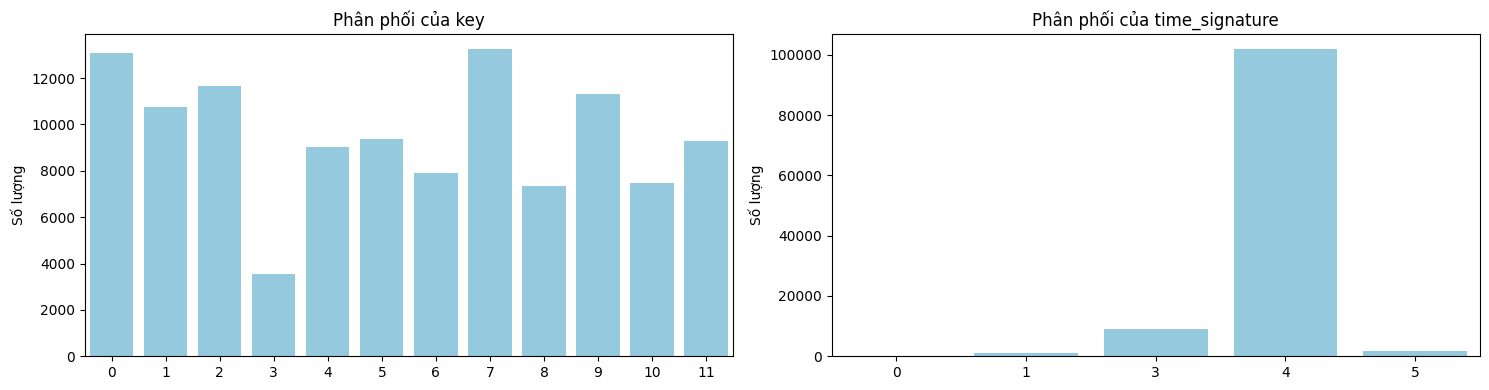

In [16]:
# Tính toán kích thước lưới biểu đồ
ord_plots = len(ordinal_cols)
ord_cols = 2  # Số biểu đồ trên 1 hàng
ord_rows = math.ceil(ord_plots / ord_cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(ord_rows, ord_cols, figsize=(15, 4 * ord_rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(ordinal_cols):
    unique_values = df[col].value_counts().sort_index()  # Sắp theo thứ tự ordinal
    sns.barplot(y=unique_values.values, x=unique_values.index, ax=axes[i], color='skyblue')
    
    
    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Nhận xét:**
    - Thuộc tính `key`: Mặc dù số lượng mẫu giữa các key có sự chênh lệch, nhưng nhìn chung dữ liệu vẫn đảm bảo độ phủ trên tất cả 12 tông nhạc, duy trì được độ đa dạng cần thiết.
    - Thuộc tính `time_signature`: Dữ liệu bị mất cân bằng nghiêm trọng và bị chi phối hoàn toàn bởi một giá trị duy nhất.

### **Cột Binary**

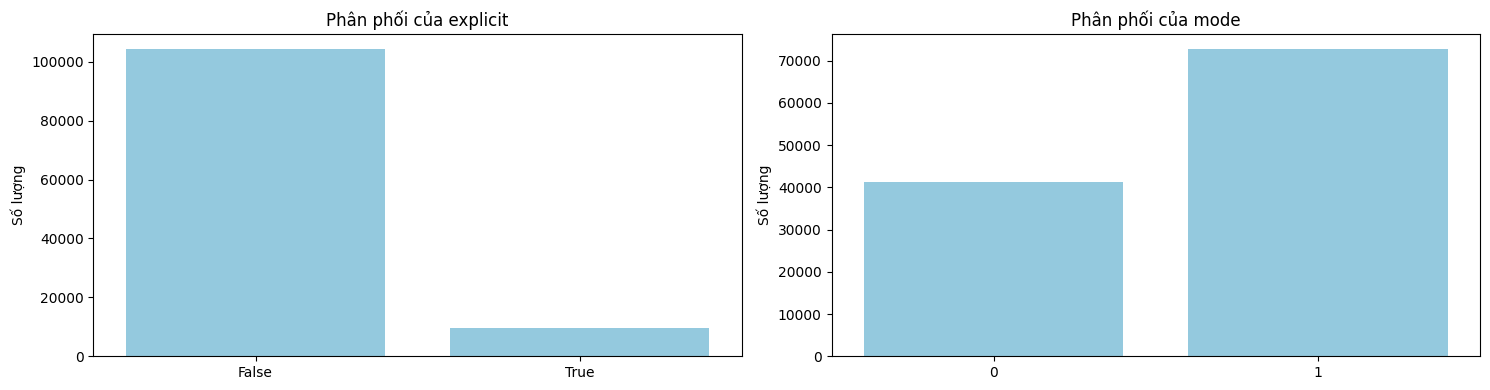

In [17]:
# Tính toán kích thước lưới biểu đồ
bin_plots = len(binary_cols)
bin_cols = 2  # Số biểu đồ trên 1 hàng
bin_rows = math.ceil(bin_plots / bin_cols)  # Tự động tính số hàng cần thiết

# Vẽ biểu đồ
fig, axes = plt.subplots(bin_rows, bin_cols, figsize=(15, 4 * bin_rows)) # Điều chỉnh kích thước tổng thể
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    unique_values = df[col].value_counts().sort_index()  # Sắp theo thứ tự ordinal
    sns.barplot(y=unique_values.values, x=unique_values.index, ax=axes[i], color='skyblue')
    
    
    axes[i].set_title(f'Phân phối của {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Số lượng')

# Ẩn các ô biểu đồ thừa
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- **Nhận xét:**
    - Thuộc tính `explicit`: Dữ liệu thể hiện sự mất cân bằng lớp nghiêm trọng. Nhóm nội dung không dán nhãn nhạy cảm chiếm tỷ trọng áp đảo (vượt mốc 100000 mẫu). Trong khi đó, nhóm có nội dung nhạy cảm là lớp thiểu số với số lượng rất thấp (khoảng dưới 10000 mẫu).
    - Thuộc tính `mode`: Dữ liệu có phân phối nhị phân với mức độ chênh lệch vừa phải. Giá trị 1 là nhóm chiếm ưu thế.

## **Phân tích dữ liệu bị thiếu**

### **Thống kê giá trị thiếu**

In [18]:
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Percentage (%)': missing_percent
})

print("="*10 + "Thống kê dữ liệu thiếu" + "="*10)
display(missing_df[missing_df['Missing Count'] > 0])

==========Thống kê dữ liệu thiếu==========


,Missing Count,Percentage (%)
artists,1,0.000877
album_name,1,0.000877
track_name,1,0.000877


### **Trực quan hóa**

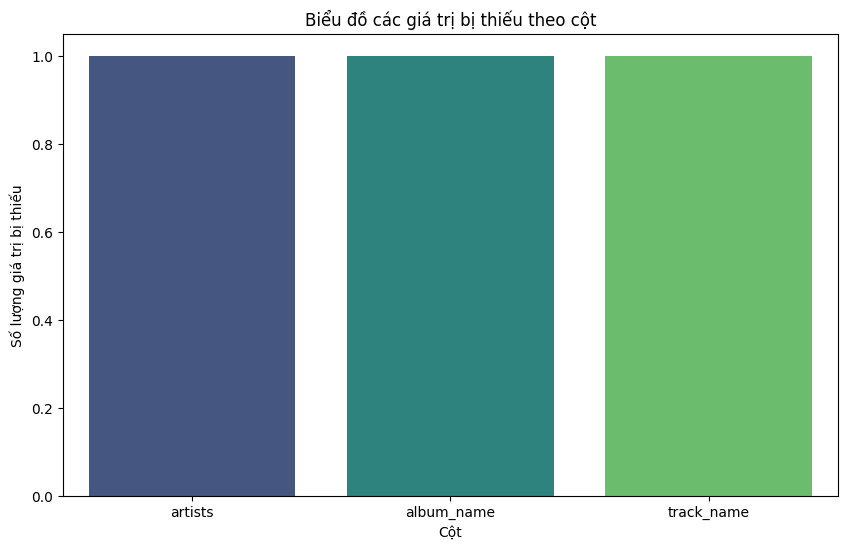

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df[missing_df['Missing Count'] > 0].index,
            y=missing_df[missing_df['Missing Count'] > 0]['Missing Count'], 
            hue=missing_df[missing_df['Missing Count'] > 0].index,
            palette='viridis')
plt.title('Biểu đồ các giá trị bị thiếu theo cột')
plt.xlabel('Cột')
plt.ylabel('Số lượng giá trị bị thiếu')
plt.show()

- **Nhận xét:**
    - Chỉ có 3 thuộc tính bị thiếu dữ liệu và số lượng chỉ là 1 mẫu quan sát.

### **Kiểm tra chi tiết**

In [20]:
row_missing = df[df.isnull().any(axis=1)]
display(row_missing)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


* Phân phối Chuẩn: **danceability**, **valence** và **tempo**
* Phân phối Lệch:
    * Lệch phải: **loudness** và **energy**
    * Lệch trái: **popularity**, **duration_ms**, **speechiness**, **acousticness**, **instrumentalness** và **liveness**
### **Kết luận & Giải pháp**

- **Quan sát:** Dữ liệu chỉ thiếu duy nhất 1 dòng tại các cột artists, album_name, track_name.
- **Nguyên nhân:** Có thể do lỗi trong quá trình thu thập dữ liệu hoặc bài hát đó bị gỡ khỏi hệ thống.
- **Giải pháp:** Vì tỷ lệ thiếu cực nhỏ ($1/114000 \approx 0\%$) và không ảnh hưởng đến tổng thể nên sẽ xóa bỏ dòng này trong bước Tiền xử lý.

#### Ma trận tương quan cho biến số

In [21]:
corr_matrix = df[numerical_cols].corr()
np.fill_diagonal(corr_matrix.values, np.nan)

# In ma trận tương quan (các giá trị làm tròn)
print("--- Ma trận Tương quan Pearson (Correlation Matrix) ---\n")
corr_matrix.round(2)

--- Ma trận Tương quan Pearson (Correlation Matrix) ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,NaN,-0.01,0.04,0.00,0.05,-0.04,-0.03,-0.10,-0.01,-0.04,0.01
duration_ms,-0.01,NaN,-0.07,0.06,-0.00,-0.06,-0.10,0.12,0.01,-0.15,0.02
danceability,0.04,-0.07,NaN,0.13,0.26,0.11,-0.17,-0.19,-0.13,0.48,-0.05
energy,0.00,0.06,0.13,NaN,0.76,0.14,-0.73,-0.18,0.18,0.26,0.25
loudness,0.05,-0.00,0.26,0.76,NaN,0.06,-0.59,-0.43,0.08,0.28,0.21
speechiness,-0.04,-0.06,0.11,0.14,0.06,NaN,-0.00,-0.09,0.21,0.04,0.02
acousticness,-0.03,-0.10,-0.17,-0.73,-0.59,-0.00,NaN,0.10,-0.02,-0.11,-0.21
instrumentalness,-0.10,0.12,-0.19,-0.18,-0.43,-0.09,0.10,NaN,-0.08,-0.32,-0.05
liveness,-0.01,0.01,-0.13,0.18,0.08,0.21,-0.02,-0.08,NaN,0.02,0.00
valence,-0.04,-0.15,0.48,0.26,0.28,0.04,-0.11,-0.32,0.02,NaN,0.08


#### Bản Đồ Nhiệt Tương Quan

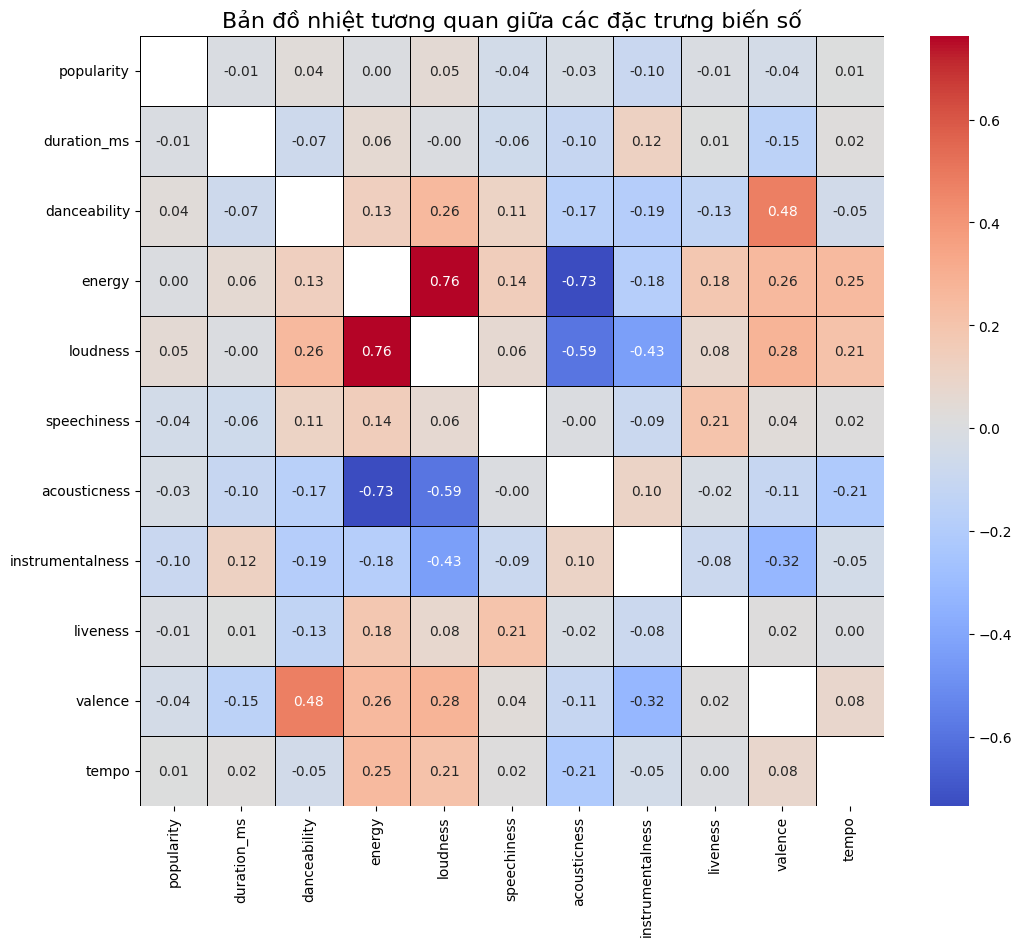

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,          # Hiển thị giá trị tương quan lên biểu đồ
    fmt=".2f",          
    cmap='coolwarm',     
    cbar=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title('Bản đồ nhiệt tương quan giữa các đặc trưng biến số', fontsize=16)
plt.show()

In [23]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Lấy ma trận tam giác trên
strong_correlations = upper_triangle.unstack().sort_values(ascending=False, key=abs).dropna()

print("--- Top 5 Cặp Tương Quan Mạnh Nhất (Positive và Negative) ---\n")
print(strong_correlations.head(5))

--- Top 5 Cặp Tương Quan Mạnh Nhất (Positive và Negative) ---

loudness          energy          0.761690
acousticness      energy         -0.733906
                  loudness       -0.589803
valence           danceability    0.477341
instrumentalness  loudness       -0.433477
dtype: float64


#### Mối Quan Hệ Đáng Ngạc Nhiên (Surprising Relationship) ?

Trong các cặp trên, không có cặp nào thực sự "gây sốc" vì chúng phản ánh các quy luật sản xuất âm nhạc hợp lý.

Tuy nhiên, mối tương quan giữa `valence` và `danceability` (r ≈ 0.48) có thể là một điểm thú vị để đào sâu:

- **Tại sao chỉ là 0.48?** Điều này gợi ý rằng *tính nhảy múa (danceability)* không chỉ phụ thuộc vào *tâm trạng (valence)*. Nó cho thấy các yếu tố khác (như `tempo`, `time_signature`, hoặc thậm chí là `popularity`) đóng vai trò quan trọng trong việc quyết định xem một bài hát có dễ nhảy hay không.


#### Bảng Tần Số cho Phân loại $\times$ Phân loại (Categorical $\times$ Categorical)

In [24]:
key_mode_crosstab_frequency = pd.crosstab(df['key'], df['mode'])
print("--- Bảng Tần số Mode theo Key ---\n")
key_mode_crosstab_frequency

--- Bảng Tần số Mode theo Key ---



mode,0,1
key,,
0,2864,10197
1,3595,7177
2,2582,9062
3,1344,2226
4,4733,4275
5,4024,5344
6,3825,4096
7,3096,10149
8,1918,5442


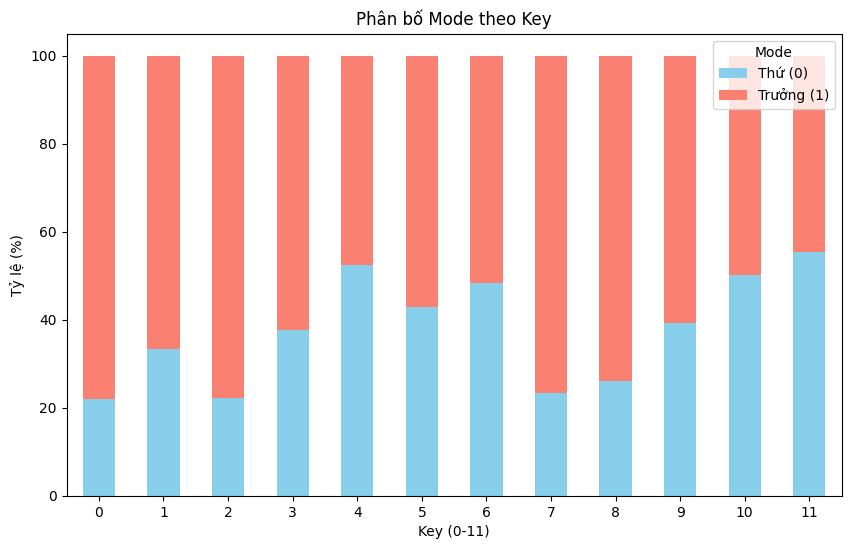

In [25]:
key_mode_crosstab = pd.crosstab(df['key'], df['mode'], normalize='index') * 100

# Ví dụ trực quan hóa: biểu đồ thanh xếp chồng (stacked bar chart)
key_mode_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Phân bố Mode theo Key')
plt.xlabel('Key (0-11)')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Mode', labels=['Thứ (0)', 'Trưởng (1)'])
plt.xticks(rotation=0)
plt.show()

In [26]:
time_mode_crosstab_frequency = pd.crosstab(df['time_signature'], df['mode'])
print("--- Bảng Tần số Mode theo Time Signature ---\n")
time_mode_crosstab_frequency

--- Bảng Tần số Mode theo Time Signature ---



mode,0,1
time_signature,,
0,52,111
1,324,649
3,2923,6272
4,37311,64532
5,709,1117


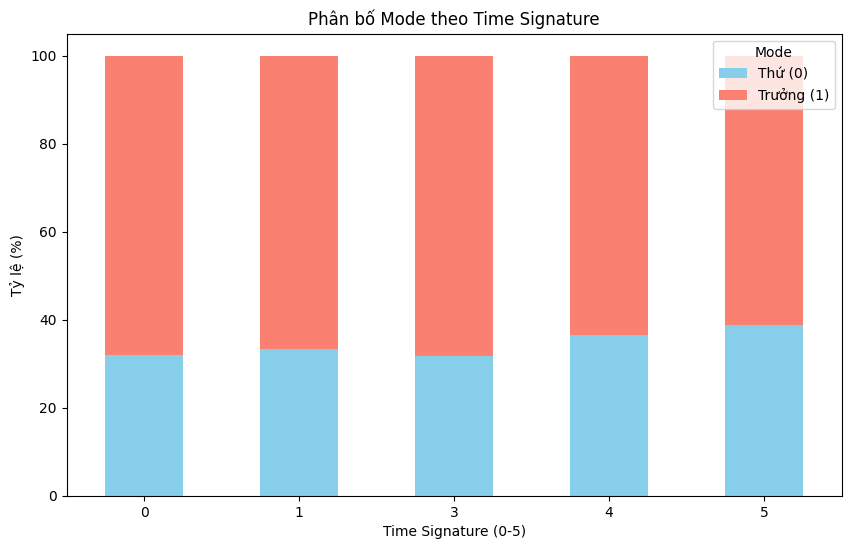

In [27]:
time_mode_crosstab = pd.crosstab(df['time_signature'], df['mode'], normalize='index') * 100

time_mode_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Phân bố Mode theo Time Signature')
plt.xlabel('Time Signature (0-5)')
plt.ylabel('Tỷ lệ (%)')
plt.legend(title='Mode', labels=['Thứ (0)', 'Trưởng (1)'])
plt.xticks(rotation=0)
plt.show()

#### Thống Kê Nhóm cho Biến Số $\times$ Phân loại (Numerical $\times$ Categorical)

In [28]:
# Tính giá trị trung bình (mean) của các đặc trưng quan trọng theo 'mode'
mode_grouped_stats = df.groupby('mode')[numerical_cols].mean()
mode_grouped_stats.rename(index={0: 'Minor (Thứ)', 1: 'Major (Trưởng)'}, inplace=True)

print("--- Thống kê Nhóm Biến Số theo Mode ---\n")
mode_grouped_stats.round(3)

--- Thống kê Nhóm Biến Số theo Mode ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
mode,,,,,,,,,,,
Minor (Thứ),33.651,233088.953,0.583,0.668,-7.980,0.091,0.273,0.177,0.210,0.467,122.125
Major (Trưởng),33.004,225152.667,0.558,0.627,-8.417,0.081,0.339,0.144,0.216,0.478,122.161


In [29]:
explicit_grouped_stats = df.groupby('explicit')[numerical_cols].mean()

explicit_grouped_stats.rename(index={False: 'Not Explicit', True: 'Explicit'}, inplace=True)

print("--- Thống kê Nhóm Biến Số theo Explicit (Nội dung nhạy cảm) ---\n")
explicit_grouped_stats.round(3)

--- Thống kê Nhóm Biến Số theo Explicit (Nội dung nhạy cảm) ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
explicit,,,,,,,,,,,
Not Explicit,32.938,230170.30,0.560,0.634,-8.426,0.075,0.325,0.166,0.212,0.474,122.174
Explicit,36.454,205127.65,0.636,0.721,-6.473,0.191,0.212,0.051,0.234,0.471,121.872


In [30]:
time_signature_grouped_stats = df.groupby('time_signature')[numerical_cols].mean()

print("--- Thống kê Nhóm Biến Số theo Time Signature (Số chỉ nhịp) ---\n")
time_signature_grouped_stats.round(3)

--- Thống kê Nhóm Biến Số theo Time Signature (Số chỉ nhịp) ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
time_signature,,,,,,,,,,,
0,36.975,173239.933,0.015,0.132,-21.833,0.002,0.500,0.638,0.441,0.014,4.453
1,29.074,208222.929,0.423,0.460,-12.878,0.126,0.590,0.307,0.246,0.334,108.216
3,29.692,222407.808,0.437,0.452,-11.738,0.095,0.569,0.228,0.213,0.343,122.400
4,33.672,229292.623,0.583,0.664,-7.813,0.082,0.285,0.146,0.213,0.490,122.609
5,28.778,201312.197,0.460,0.486,-11.929,0.175,0.519,0.242,0.222,0.363,113.080


In [31]:
key_grouped_stats = df.groupby('key')[numerical_cols].mean()

print("--- Thống kê Nhóm Biến Số theo Key (Tông nhạc) ---\n")
key_grouped_stats.round(3)

--- Thống kê Nhóm Biến Số theo Key (Tông nhạc) ---



,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
key,,,,,,,,,,,
0,32.520,222113.255,0.561,0.609,-8.691,0.072,0.352,0.148,0.212,0.486,121.490
1,33.200,230937.197,0.578,0.683,-7.877,0.104,0.250,0.179,0.207,0.447,123.308
2,34.378,229086.509,0.545,0.617,-8.656,0.077,0.349,0.157,0.223,0.458,121.598
3,33.032,223043.214,0.547,0.570,-9.243,0.081,0.419,0.176,0.195,0.443,118.189
4,34.644,232105.096,0.556,0.635,-8.296,0.080,0.327,0.141,0.227,0.459,122.608
5,32.931,224688.898,0.567,0.617,-8.471,0.079,0.352,0.153,0.215,0.484,119.402
6,33.586,230488.715,0.581,0.676,-7.693,0.097,0.261,0.161,0.205,0.474,123.556
7,32.580,230065.042,0.564,0.636,-8.392,0.080,0.321,0.161,0.220,0.476,122.774
8,32.959,224208.789,0.580,0.663,-7.693,0.092,0.284,0.148,0.192,0.480,122.869


#### Quan Sát và Nhận Định Ban Đầu

#### 1. Tóm Tắt (Summary)

##### 1.1. 3–5 Quan sát Chủ chốt (Key Observations)

- **Tương quan Đa cộng tuyến:**  
  Có sự tương quan dương rất mạnh giữa **Energy** và **Loudness** (*r ≈ 0.76*), cho thấy các bài hát có cường độ cao thường được sản xuất ở mức âm lượng lớn. Mối quan hệ này cần được quản lý trong mô hình ML.

- **Sự Đối lập Âm nhạc:**  
  **Acousticness** có mối quan hệ nghịch đảo mạnh với **Energy** (*r ≈ –0.73*), chứng tỏ các bài hát acoustic có xu hướng ít năng lượng hơn.

- **Mode và Tâm trạng:**  
  **Mối quan hệ phức tạp theo Mode:** Mode Trưởng (Major) có `valence` (0.478) cao hơn Mode Thứ (Minor, 0.467), phù hợp với lý thuyết âm nhạc về tâm trạng. **Tuy nhiên, một cách bất ngờ, Mode Thứ lại có** `danceability` **(0.583) cao hơn Mode Trưởng (0.558)**, cho thấy tính dễ nhảy không hoàn toàn phụ thuộc vào sự tích cực của bài hát.

- **Mô hình Hành vi:**  
  Dù **Time Signature 4/4** chiếm ưu thế, các bài hát **Explicit** có xu hướng có **speechiness** trung bình cao hơn.

---

##### 1.2. Vấn đề Chất lượng Dữ liệu đã Xác định

- **Dữ liệu thiếu:**  
  Tồn tại rất ít missing values trong các cột phân loại quan trọng như `artists`, `album_name` và `track_name`.

- **Giá trị ngoại lai:**  
  Cột `duration_ms` chứa rất nhiều giá trị ngoại lai (ví dụ: bài hát quá dài), cần được kiểm tra và xử lý.

---

##### 1.3. Các Bước Tiền xử lý cần thiết

- **Chuẩn hóa Thang đo (Scaling):**  
  Các cột số như `tempo`, `duration_ms`, `popularity`, `loudness`, ... cần được normalize về cùng một thang đo (0–1 hoặc Z-score) trước khi sử dụng trong mô hình ML.

- **Xử lý Missing Data:**  
  Cần quyết định cách xử lý giá trị thiếu trong `artist`, `album_name` và `track_name` (loại bỏ hàng hoặc gán nhãn `"Unknown"`).

- **Mã hóa Biến phân loại:**  
  Các cột như `key`, `mode`, `explicit`, `time_signature` cần được chuyển thành dạng số (ví dụ: One-Hot Encoding cho `key`) trước khi đưa vào mô hình.

##### 1.4. Mẫu hình dẫn đến Câu hỏi Nghiên cứu

- **Phân loại (Classification ML):**  
  Sự khác biệt rõ ràng về các đặc trưng âm thanh (như `acousticness`, `energy`, `danceability`) giữa các `track_genre` khác nhau tạo cơ sở vững chắc để xây dựng mô hình **dự đoán thể loại** của một bài hát.

- **Hồi quy (Regression ML):**  
  Mối quan hệ tương quan vừa phải giữa `popularity` với các đặc trưng cảm xúc/nhịp điệu (`danceability`, `valence`) tạo ra cơ hội để phát triển mô hình **dự đoán mức độ phổ biến** (`popularity`) của một bài hát.


#### 2. Cảnh Báo và Hạn Chế (Red Flags)

##### 2.1. Các Mối Quan ngại Nghiêm trọng về Chất lượng

- **Tính đại diện của Dữ liệu:**  
  Các biến như `explicit` và `time_signature` có sự mất cân bằng rất lớn về phân phối (ví dụ: nhịp 4 chiếm ưu thế). Điều này có thể dẫn đến thiên vị trong mô hình (Model Bias), khiến mô hình khó dự đoán các bài hát thuộc nhịp hiếm.

- **Đa cộng tuyến tiềm ẩn:**  
  Cần lưu ý rằng `energy` và `loudness` có thể cung cấp thông tin trùng lặp; nếu sử dụng cả hai trong mô hình hồi quy, cần kiểm tra VIF (Variance Inflation Factor).

##### 2.2. Các Hạn chế có thể ảnh hưởng đến Phân tích

- **Thiếu dữ liệu người dùng:**  
  Bộ dữ liệu chỉ bao gồm đặc trưng bài hát, thiếu thông tin về người dùng, địa điểm, hoặc lịch sử nghe. Điều này **giới hạn** khả năng phân tích yếu tố nhân khẩu học đằng sau sự phổ biến.

- **Định nghĩa của Popularity:**  
  Điểm `popularity` là tương đối và thay đổi theo thời gian. Các kết luận về `popularity` chỉ chính xác tại thời điểm thu thập dữ liệu và có thể không đại diện cho xu hướng lâu dài.
